## A bit more advanced example

Binary classification.

Keras also includes an [IMDB](https://www.imdb.com) (Internet Movie Database) dataset. 

This dataset contains 50k movie reviews from the users of the website. All the reviews are either very positive, or very negative.

The 50k reviews are split into 25k for training, and 25k for testing, and in each one of those data splits, 50% of the reviews are positive and 50% are negative. Therefore, the classes are perfectly balanced.

The reviews have already been pre-processed, and for memory efficiency, the words have been converted to integers. So the bare reviews you will see in the training data come as integers and therefore are unreadable as they come. But since each integer represents a work in the English dictionary, we can easily reconstruct the original reviews.



In [1]:
from keras.datasets import imdb
from keras import layers, models

import numpy as np

import matplotlib.pyplot as plt

In [2]:
'''
The num_words parameter in this load_data function is to take the top 10000 most common words in all of the reviews.
Uncommon words will not be loaded.
'''
NUM_MOST_COMMON_WORDS = 10000

(train_X, train_y), (test_X, test_y) = imdb.load_data(num_words=NUM_MOST_COMMON_WORDS)

'''
Again, if this last line of code doesn't work, run this:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

'''

"\nAgain, if this last line of code doesn't work, run this:\n\nimport ssl\nssl._create_default_https_context = ssl._create_unverified_context\n\n"

In [3]:
# This is just a function to reconstruct a message, so we can explore the training data:
invert_dictionary = imdb.get_word_index() # Word to integer dictionary given by the dataset
dictionary = {value: key for key, value in invert_dictionary.items()}


def reconstruct_message(sample):
    review = ' '.join(dictionary[i-3] for i in sample if i-3 in dictionary)
    return review

In [4]:
# Feel free to add/remove indices here to check different reviews:
REVIEWS_TO_CHECK = [4, 64, 9876, 15543]

for r in REVIEWS_TO_CHECK:
    print(reconstruct_message(train_X[r]))
    print('------------------------------------------------------------------------------------')
    print()

worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life
------------------------------------------------------------------------------------

i'm probably one of the biggest nancy drew fans out there i've read every book three times over and i've played a lot of the nancy drew games i loved this movie it kept you entertained the whole tim

We cannot feed a list of integers (or a list of words) directly into a neural network. We have to vectorise these lists (covert them into **tensors** - more on tensors shortly). 

We are going to use a simple transformation to vectorise them:
1. Create a list of 10000 integers, filled with 0s
2. If the word with index 40 (remember the words are integers) is in the review, then the 40th position in the previous list is set to 1

We will do those two steps with Numpy

In [5]:
def vectorise_reviews(reviews_data, input_features=NUM_MOST_COMMON_WORDS):
    result = np.zeros((len(reviews_data), input_features))
    for review, word in enumerate(reviews_data):
        result[review, word] = 1
    return result

In [6]:
vect_train_X = vectorise_reviews(train_X)
vect_test_X = vectorise_reviews(test_X)

In [7]:
# The labels are 

In [8]:
train_y.dtype

dtype('int64')

## Model architecture definition:

In [9]:
# This is a Deep Feedforward Neural Net like we saw in the slides
model = models.Sequential() 

'''
We now add layers. As we mentioned in the previous interactive activity We do not need to add 
the input layer in Keras. However, I am now explicitly adding it so we don't have to declare the input_shape
parameter in the first hidden layer.

This time we are adding 2 hidden layers and then the output layer.
NOTE: I am putting 16 hidden neurons, but feel free to change it.
(check the slides to make sense of these lines of code)
'''

model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

# We have 2 classes, so 1 sigmoid neuron that outputs the probability of being one class or another is enough
model.add(layers.Dense(1, activation='sigmoid'))

## Model compilation:

In [10]:
# Notice that Keras includes different versions of the negative log likelihood (cross-entropy) function...
# depending on the output type of our ANN 
# (in the previous interactive activity was categorical/multi-class, now is binary)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# As we will see in the future, we could define our own loss functions and performance metrics and pass them to Keras

## Validation set:

This time we will do it slightly different. We will build a validation set to do a first check on our fitted model.

For build this, we will set apart the first 10k samples from the training data.

In [11]:
val_X = vect_train_X[:10000]
remaining_train_X = vect_train_X[10000:]

val_y = train_y[:10000]
remaining_train_y = train_y[10000:]

And now we can directly use that validation dataset during our optimisation process, to check how we expect the model to behave with the test data later on!

Keras implements this very neatly:

In [12]:
history = model.fit(
    remaining_train_X,
    remaining_train_y,
    epochs=20,
    batch_size=512,
    validation_data=(val_X, val_y)
)

Epoch 1/20
30/30 [==============================] - 4s 124ms/step - loss: 0.5396 - accuracy: 0.7790 - val_loss: 0.4339 - val_accuracy: 0.8410
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3250 - accuracy: 0.8996 - val_loss: 0.3270 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2385 - accuracy: 0.9229 - val_loss: 0.2887 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1850 - accuracy: 0.9413 - val_loss: 0.2770 - val_accuracy: 0.8924
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1520 - accuracy: 0.9509 - val_loss: 0.2785 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1249 - accuracy: 0.9602 - val_loss: 0.2901 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1037 - accuracy: 0.9678 - val_loss: 0.3057 - val_accuracy: 0.8857
Epoch 8/20
3

Notice that between each epoch there is a small delay. This is because Keras is calculating the predictions for the validation dataset.

And also for each epoch we are not getting the `val_loss` and `val_accuracy` parameters, which mean exactly what you are thinking: the loss and accuracies obtained after predicting for the validation test using that epoch's ANN configuration.

As you can clearly see, the fact that our training accuracy is becoming higher (and the training loss lower) doesn't mean that our validation accuracies and/or loss are also improving! This is because our model is likely to be overfitting.

Let's plot them from the `history` we got when fitting our ANN:

In [13]:
history_dict = history.history
print('We have these parameters stored in our fitting history:')
history_dict.keys()

We have these parameters stored in our fitting history:


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
# Preparing some data for the plot:
accuracies = history_dict['accuracy']
val_accuracies = history_dict['val_accuracy']
epochs = range(1, len(accuracies)+1)

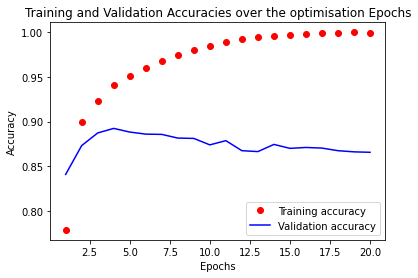

In [15]:
plt.plot(epochs, accuracies, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracies over the optimisation Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the plot above we can see that our Validation Accuracy peaked between the 3rd and the 5th epoch. After that, our ANN became more and more overfitted to the training data, without making any progress on other data.

Let's re-fit our model but with just 4 epochs and see if the test accuracy we get is similar to the validation one:

In [16]:
model2 = models.Sequential()
model2.add(layers.Input(shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(
    remaining_train_X,
    remaining_train_y,
    epochs=4, # The best Epoch we found before it became overfitted!
    batch_size=512,
    validation_data=(val_X, val_y)
)

Epoch 1/4
30/30 [==============================] - 2s 61ms/step - loss: 0.5041 - accuracy: 0.7903 - val_loss: 0.3944 - val_accuracy: 0.8487
Epoch 2/4
30/30 [==============================] - 1s 21ms/step - loss: 0.2947 - accuracy: 0.9025 - val_loss: 0.3133 - val_accuracy: 0.8749
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2166 - accuracy: 0.9285 - val_loss: 0.2969 - val_accuracy: 0.8802
Epoch 4/4
30/30 [==============================] - 1s 25ms/step - loss: 0.1707 - accuracy: 0.9445 - val_loss: 0.2748 - val_accuracy: 0.8901


In [17]:
test_loss, test_accuracy = model2.evaluate(vect_test_X, test_y)

782/782 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.8828


In [18]:
print('Training accuracy:', history2.history['accuracy'][-1])
print('Validation accuracy:', history2.history['val_accuracy'][-1])
print('Test accuracy:', test_accuracy)

Training accuracy: 0.9444666504859924
Validation accuracy: 0.8901000022888184
Test accuracy: 0.8828399777412415


Our test accuracy should now very similar to the validation accuracy we were getting when training our model, and the overfitting effect should be smaller.

Please take a moment to reflect on the results too: The fact that with a few lines of code we can achieve real accuracies of between 85% and 90% to distinguish positive and negative comments is impressive. And we have just used  two hidden layers of 16 neurons each.

This is where the hype comes in the community, and hopefully produces some excitement for you too. 

**As always, play with the code:** Add layers, add neurons to the layers, change the parameters I specified, etc. You cannot break anything.

**There is a strong possibility** that you will find much better ANN architectures. 

### Here are some ideas for you to practice:
* We used two hidden layers; try using one or three hidden layers, and see how doing so affects validation and test accuracies
* Try using hidden layers with more or less neurons. We used 16. Try 8, 32, 64. What happens with the accuracies?
* Try using the Mean Square Error (`mse`) instead of `binary_crossentropy` as a loss function
* Try using the `tanh` activation in your hidden layers, instead of `relu`